In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import operator

In [2]:
train_file = "gene.train"
dev_file = "gene.key"
train_lines = []
with open(train_file) as f:
    train_lines = f.readlines()
    

dev_lines = []
with open(dev_file) as f:
    dev_lines = f.readlines()

In [5]:
word_tags = {}
word_dev_tags = {}

line_arr = [train_lines, dev_lines]
for i in range(len(line_arr)):
    if i == 0:
        tags = word_tags
    else:
        print(i)
        tags = word_dev_tags
        
    for line in line_arr[i]:
        items  = line.split()
        if not len(items)==2: continue
        #print(items)
        if items[1] not in tags: 
            tags[items[1]] =0
        tags[items[1]] +=1
    
print(len(word_tags), len(word_dev_tags))

1
2 2


In [8]:
labels = []
counts_train = []
counts_dev = []
for tag in word_tags.keys():
    labels.append(tag)
    
for tag in labels:
    counts_train.append(word_tags[tag])
    counts_dev.append(word_dev_tags[tag])
    
print(labels)
print(counts_train)
print(counts_dev)

['O', 'I-GENE']
[345128, 41072]
[13193, 1527]


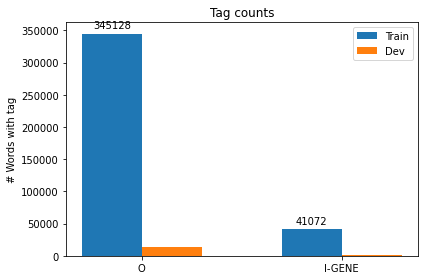

In [9]:

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts_train, width, label='Train')
rects2 = ax.bar(x + width/2, counts_dev, width, label='Dev')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# Words with tag')
ax.set_title('Tag counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()



In [10]:
counts_file = "gene.counts"
words = {}
ngrams = {1 : {}, 2 : {}, 3 : {}}
word_counts = {}
for l in open(counts_file):
    t = l.strip().split()
    count = int(t[0])
    key = tuple(t[2:])
    if t[1] == "1-GRAM": ngrams[1][key[0]] = count
    elif t[1] == "2-GRAM": ngrams[2][key] = count
    elif t[1] == "3-GRAM": ngrams[3][key] = count
    elif t[1] == "WORDTAG":
        words[key] = count
        word_counts.setdefault(key[1], 0)
        word_counts[key[1]] += count

In [11]:
i =0
for key in ngrams[1]:
    print(key, ngrams[1][key])

O 345128
I-GENE 41072


In [12]:
i =0
for key in ngrams[2]:
    print(key, ngrams[2][key])
    i+=1
    if i> 20:
        break

('*', 'O') 13047
('*', '*') 13796
('O', 'O') 315457
('O', 'I-GENE') 15888
('I-GENE', 'I-GENE') 24435
('I-GENE', 'O') 16624
('I-GENE', 'STOP') 13
('O', 'STOP') 13783
('*', 'I-GENE') 749


In [13]:
i =0
for key in ngrams[3]:
    print(key, ngrams[3][key])
    i+=1
    if i> 20:
        break

('*', '*', 'O') 13047
('*', 'O', 'O') 12451
('O', 'O', 'I-GENE') 11804
('O', 'I-GENE', 'I-GENE') 9181
('I-GENE', 'I-GENE', 'O') 9622
('I-GENE', 'O', 'I-GENE') 3491
('I-GENE', 'I-GENE', 'I-GENE') 14802
('I-GENE', 'I-GENE', 'STOP') 11
('O', 'O', 'O') 291686
('O', 'O', 'STOP') 11967
('I-GENE', 'O', 'O') 11320
('O', 'I-GENE', 'O') 6706
('*', '*', 'I-GENE') 749
('*', 'I-GENE', 'I-GENE') 452
('I-GENE', 'O', 'STOP') 1813
('*', 'I-GENE', 'O') 296
('*', 'O', 'I-GENE') 593
('*', 'O', 'STOP') 3
('*', 'I-GENE', 'STOP') 1
('O', 'I-GENE', 'STOP') 1


In [14]:
i =0
for key in word_counts:
    print(key, word_counts[key])
    i+=1
    if i> 20:
        break

Comparison 40
with 3367
alkaline 29
phosphatases 11
and 9980
5 981
- 13150
_RARE_ 37513
aspects 16
of 14771
neonatal 11
hyperbilirubinemia 5
. 15509
When 63
CSF 65
[ 136
HCO3 7
is 2348
shown 174
as 1263
a 5498


In [138]:
from count_freqs import *

In [139]:
inp = open(train_file,"r")
sentence_itr = sentence_iterator(simple_conll_corpus_iterator(inp))

In [140]:
word_freqs = {}
for sent in sentence_itr:
    for word, _ in sent:
        if word not in word_freqs:
            word_freqs[word] = 0
        word_freqs[word] += 1

In [141]:
rare_cutoff = 5
rare_words = {}
for w in word_freqs:
    if word_freqs[w] < rare_cutoff:
        rare_words[w] = word_freqs[w]

In [142]:
# for w in rare_words:
#     print(w, rare_words[w])

In [196]:
common_3suffixes = {}
common_2suffixes = {}
for w in rare_words:
    if len(w) >= 3:
        suffix2 = w[-2:]
        suffix3 = w[-3:]
        if suffix2 not in common_2suffixes:
            common_2suffixes[suffix2] = 0
        if suffix3 not in common_3suffixes:
            common_3suffixes[suffix3] = 0
        common_2suffixes[suffix2] += 1
        common_3suffixes[suffix3] += 1

three_suffixes = common_3suffixes.keys()
delete_suf = []
for suffix in three_suffixes:
    if common_3suffixes[suffix] < 30:
        delete_suf.append(suffix)
for suf in delete_suf:
    del common_3suffixes[suf]

three_suffixes = common_3suffixes.keys()
two_in_three_suff = set([x[-2:] for x in three_suffixes])
delete_suff = []
for s in common_2suffixes:
    if s in two_in_three_suff:
        delete_suff.append(s)

for suf in common_2suffixes:
    if common_2suffixes[suf] < 30 and suf not in delete_suff:
        delete_suff.append(suf)
# print(delete_suff)
for suf in delete_suff:
    del common_2suffixes[suf]


In [197]:
suffixes_dict = {}
for s in common_2suffixes:
    suffixes_dict[s] = True
for s in common_3suffixes:
    suffixes_dict[s] = True

In [198]:
len(suffixes_dict)

157

In [199]:
rare_words_file = "rare_words.txt"
with open(rare_words_file, "w") as wf:
    for suffix in suffixes_dict:
        wf.writelines(suffix + "\n")


In [200]:
rare_words_file = "rare_words.txt"
suffixes_read = {}
with open(rare_words_file, "r") as rf:
    lines = rf.readlines()
    for l in lines:
        suffixes_read[l[:-1]] = True

In [201]:
a = "_ase_"

In [202]:
a[1:-1]

'ase'

In [203]:
suffixes_read

{'am': True,
 'O2': True,
 'me': True,
 'ol': True,
 'sh': True,
 'as': True,
 'ch': True,
 'gs': True,
 'ct': True,
 'il': True,
 'ms': True,
 'ze': True,
 'ae': True,
 'ks': True,
 'ea': True,
 'rd': True,
 'nd': True,
 'ca': True,
 '10': True,
 'rm': True,
 'ck': True,
 'ra': True,
 'ds': True,
 'et': True,
 'la': True,
 'th': True,
 'rt': True,
 'yl': True,
 'ps': True,
 'na': True,
 'ls': True,
 'at': True,
 '13': True,
 'll': True,
 'ge': True,
 'el': True,
 'II': True,
 'pe': True,
 'it': True,
 '20': True,
 'C1': True,
 'F1': True,
 'BP': True,
 'P1': True,
 '60': True,
 'P2': True,
 '12': True,
 'S1': True,
 'p1': True,
 'AP': True,
 '18': True,
 '11': True,
 '16': True,
 '1p': True,
 '00': True,
 'R1': True,
 'A1': True,
 'Ps': True,
 'RE': True,
 'L1': True,
 'ase': True,
 'gic': True,
 'tic': True,
 'eta': True,
 'eal': True,
 'ted': True,
 'sed': True,
 'nic': True,
 'ide': True,
 'cal': True,
 'one': True,
 'tal': True,
 'lly': True,
 'hic': True,
 'ion': True,
 'ive': Tr

In [149]:
common_3suffixes

{'ase': 165,
 'gic': 46,
 'tic': 267,
 'eta': 33,
 'eal': 33,
 'ted': 290,
 'sed': 85,
 'nic': 131,
 'ide': 143,
 'cal': 159,
 'one': 101,
 'tal': 91,
 'lly': 176,
 'hic': 51,
 'ion': 694,
 'ive': 192,
 'ogy': 56,
 'ics': 54,
 'ses': 143,
 'ors': 65,
 'oid': 66,
 'tly': 40,
 'nce': 92,
 'nes': 64,
 'ria': 40,
 'ins': 73,
 'ate': 246,
 'sis': 211,
 'ble': 111,
 'lin': 77,
 'ies': 120,
 'ity': 175,
 'ure': 54,
 'mia': 71,
 'gen': 33,
 'res': 39,
 'rin': 65,
 'sin': 46,
 'ans': 40,
 'ine': 349,
 'ene': 51,
 'ous': 113,
 'ded': 46,
 'cin': 82,
 'ium': 82,
 'lar': 117,
 'nts': 98,
 'tis': 66,
 'ent': 165,
 'omy': 57,
 'ces': 57,
 'ges': 30,
 'ing': 748,
 'zed': 83,
 'ned': 49,
 'ter': 100,
 'ant': 74,
 'des': 56,
 'ons': 203,
 'xin': 30,
 'tin': 79,
 'red': 63,
 'ess': 62,
 'pic': 40,
 'ary': 74,
 'try': 52,
 'lic': 54,
 'ric': 96,
 'ism': 31,
 'ely': 70,
 'ers': 122,
 'tor': 79,
 'oma': 44,
 'ory': 60,
 'tes': 127,
 'ain': 34,
 'phy': 47,
 'nal': 147,
 'pha': 41,
 'ile': 39,
 'mic': 82,
 '

In [156]:
common_3suffixes

{'ase': 165,
 'gic': 46,
 'tic': 267,
 'eta': 33,
 'eal': 33,
 'ted': 290,
 'sed': 85,
 'nic': 131,
 'ide': 143,
 'cal': 159,
 'one': 101,
 'tal': 91,
 'lly': 176,
 'hic': 51,
 'ion': 694,
 'ive': 192,
 'ogy': 56,
 'ics': 54,
 'ses': 143,
 'ors': 65,
 'oid': 66,
 'tly': 40,
 'nce': 92,
 'nes': 64,
 'ria': 40,
 'ins': 73,
 'ate': 246,
 'sis': 211,
 'ble': 111,
 'lin': 77,
 'ies': 120,
 'ity': 175,
 'ure': 54,
 'mia': 71,
 'gen': 33,
 'res': 39,
 'rin': 65,
 'sin': 46,
 'ans': 40,
 'ine': 349,
 'ene': 51,
 'ous': 113,
 'ded': 46,
 'cin': 82,
 'ium': 82,
 'lar': 117,
 'nts': 98,
 'tis': 66,
 'ent': 165,
 'omy': 57,
 'ces': 57,
 'ges': 30,
 'ing': 748,
 'zed': 83,
 'ned': 49,
 'ter': 100,
 'ant': 74,
 'des': 56,
 'ons': 203,
 'xin': 30,
 'tin': 79,
 'red': 63,
 'ess': 62,
 'pic': 40,
 'ary': 74,
 'try': 52,
 'lic': 54,
 'ric': 96,
 'ism': 31,
 'ely': 70,
 'ers': 122,
 'tor': 79,
 'oma': 44,
 'ory': 60,
 'tes': 127,
 'ain': 34,
 'phy': 47,
 'nal': 147,
 'pha': 41,
 'ile': 39,
 'mic': 82,
 '

In [205]:
a = "Abc"
a[1].isupper()





False

In [207]:
a = "abc123"
a.isalnum()

True